

---


# SEOUL BIKE DATA ANALYSIS

---



In [1]:
# Import Export
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
pd.options.display.max_rows = 20
pd.options.display.float_format = "{:.3f}".format

In [2]:
# Unicode to read degree symbol
total_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv", encoding="unicode_escape")

In [3]:
total_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.200,37,2.200,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.500,38,0.800,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.000,39,1.000,2000,-17.700,0.000,0.000,0.000,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.200,40,0.900,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.000,36,2.300,2000,-18.600,0.000,0.000,0.000,Winter,No Holiday,Yes


In [4]:
total_df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [5]:
# No null values
total_df.isnull().values.any()

False

In [6]:
# No missing values
total_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000
mean,704.602,11.500,12.883,58.226,1.725,1436.826,4.074,0.569,0.149,0.075
std,644.997,6.923,11.945,20.362,1.036,608.299,13.060,0.869,1.128,0.437
min,0.000,0.000,-17.800,0.000,0.000,27.000,-30.600,0.000,0.000,0.000
25%,191.000,5.750,3.500,42.000,0.900,940.000,-4.700,0.000,0.000,0.000
50%,504.500,11.500,13.700,57.000,1.500,1698.000,5.100,0.010,0.000,0.000
75%,1065.250,17.250,22.500,74.000,2.300,2000.000,14.800,0.930,0.000,0.000
max,3556.000,23.000,39.400,98.000,7.400,2000.000,27.200,3.520,35.000,8.800


In [7]:
# temp > hour > dew > solar > vis > wspd > -rain > -snow > -hum
# drop dew for multicollinearity with temp > 0.9
total_df.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000,0.410,0.539,-0.200,0.121,0.199,0.380,0.262,-0.123,-0.142
Hour,0.410,1.000,0.124,-0.242,0.285,0.099,0.003,0.145,0.009,-0.022
Temperature(°C),0.539,0.124,1.000,0.159,-0.036,0.035,0.913,0.354,0.050,-0.218
Humidity(%),-0.200,-0.242,0.159,1.000,-0.337,-0.543,0.537,-0.462,0.236,0.108
Wind speed (m/s),0.121,0.285,-0.036,-0.337,1.000,0.172,-0.176,0.332,-0.020,-0.004
Visibility (10m),0.199,0.099,0.035,-0.543,0.172,1.000,-0.177,0.150,-0.168,-0.122
Dew point temperature(°C),0.380,0.003,0.913,0.537,-0.176,-0.177,1.000,0.094,0.126,-0.151
Solar Radiation (MJ/m2),0.262,0.145,0.354,-0.462,0.332,0.150,0.094,1.000,-0.074,-0.072
Rainfall(mm),-0.123,0.009,0.050,0.236,-0.020,-0.168,0.126,-0.074,1.000,0.008
Snowfall (cm),-0.142,-0.022,-0.218,0.108,-0.004,-0.122,-0.151,-0.072,0.008,1.000


In [8]:
total_df["Date"] = pd.to_datetime(total_df["Date"], format = "%d/%m/%Y")
total_df["Day"] = total_df["Date"].dt.day_name()
total_df["Month"] = total_df["Date"].dt.month_name()
total_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month
0,2017-12-01,254,0,-5.200,37,2.200,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes,Friday,December
1,2017-12-01,204,1,-5.500,38,0.800,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes,Friday,December
2,2017-12-01,173,2,-6.000,39,1.000,2000,-17.700,0.000,0.000,0.000,Winter,No Holiday,Yes,Friday,December
3,2017-12-01,107,3,-6.200,40,0.900,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes,Friday,December
4,2017-12-01,78,4,-6.000,36,2.300,2000,-18.600,0.000,0.000,0.000,Winter,No Holiday,Yes,Friday,December


In [9]:
total_df.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000,0.410,0.539,-0.200,0.121,0.199,0.380,0.262,-0.123,-0.142
Hour,0.410,1.000,0.124,-0.242,0.285,0.099,0.003,0.145,0.009,-0.022
Temperature(°C),0.539,0.124,1.000,0.159,-0.036,0.035,0.913,0.354,0.050,-0.218
Humidity(%),-0.200,-0.242,0.159,1.000,-0.337,-0.543,0.537,-0.462,0.236,0.108
Wind speed (m/s),0.121,0.285,-0.036,-0.337,1.000,0.172,-0.176,0.332,-0.020,-0.004
Visibility (10m),0.199,0.099,0.035,-0.543,0.172,1.000,-0.177,0.150,-0.168,-0.122
Dew point temperature(°C),0.380,0.003,0.913,0.537,-0.176,-0.177,1.000,0.094,0.126,-0.151
Solar Radiation (MJ/m2),0.262,0.145,0.354,-0.462,0.332,0.150,0.094,1.000,-0.074,-0.072
Rainfall(mm),-0.123,0.009,0.050,0.236,-0.020,-0.168,0.126,-0.074,1.000,0.008
Snowfall (cm),-0.142,-0.022,-0.218,0.108,-0.004,-0.122,-0.151,-0.072,0.008,1.000


In [10]:
total_df["Day Number"] = total_df["Day"].map({'Sunday' : 1, 'Monday' : 2, 'Tuesday' : 3, 'Wednesday' : 4, 'Thursday' : 5, 'Friday' : 6, 'Saturday' : 7})
total_df["Month Number"] = total_df["Date"].dt.month
total_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Day Number,Month Number
0,2017-12-01,254,0,-5.200,37,2.200,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes,Friday,December,6,12
1,2017-12-01,204,1,-5.500,38,0.800,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes,Friday,December,6,12
2,2017-12-01,173,2,-6.000,39,1.000,2000,-17.700,0.000,0.000,0.000,Winter,No Holiday,Yes,Friday,December,6,12
3,2017-12-01,107,3,-6.200,40,0.900,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes,Friday,December,6,12
4,2017-12-01,78,4,-6.000,36,2.300,2000,-18.600,0.000,0.000,0.000,Winter,No Holiday,Yes,Friday,December,6,12


In [11]:
total_df.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day Number,Month Number
Rented Bike Count,1.000,0.410,0.539,-0.200,0.121,0.199,0.380,0.262,-0.123,-0.142,0.032,0.134
Hour,0.410,1.000,0.124,-0.242,0.285,0.099,0.003,0.145,0.009,-0.022,0.000,0.000
Temperature(°C),0.539,0.124,1.000,0.159,-0.036,0.035,0.913,0.354,0.050,-0.218,-0.008,0.216
Humidity(%),-0.200,-0.242,0.159,1.000,-0.337,-0.543,0.537,-0.462,0.236,0.108,-0.014,0.140
Wind speed (m/s),0.121,0.285,-0.036,-0.337,1.000,0.172,-0.176,0.332,-0.020,-0.004,0.041,-0.157
Visibility (10m),0.199,0.099,0.035,-0.543,0.172,1.000,-0.177,0.150,-0.168,-0.122,0.004,0.065
Dew point temperature(°C),0.380,0.003,0.913,0.537,-0.176,-0.177,1.000,0.094,0.126,-0.151,-0.016,0.243
Solar Radiation (MJ/m2),0.262,0.145,0.354,-0.462,0.332,0.150,0.094,1.000,-0.074,-0.072,0.026,-0.032
Rainfall(mm),-0.123,0.009,0.050,0.236,-0.020,-0.168,0.126,-0.074,1.000,0.008,-0.012,0.012
Snowfall (cm),-0.142,-0.022,-0.218,0.108,-0.004,-0.122,-0.151,-0.072,0.008,1.000,-0.007,0.053


In [12]:
y = total_df["Rented Bike Count"]
x = total_df.drop("Rented Bike Count", axis=1)



---


# GRAPHS

---


In [13]:
sns.set(rc={"figure.figsize":(20, 10)})

<AxesSubplot:>

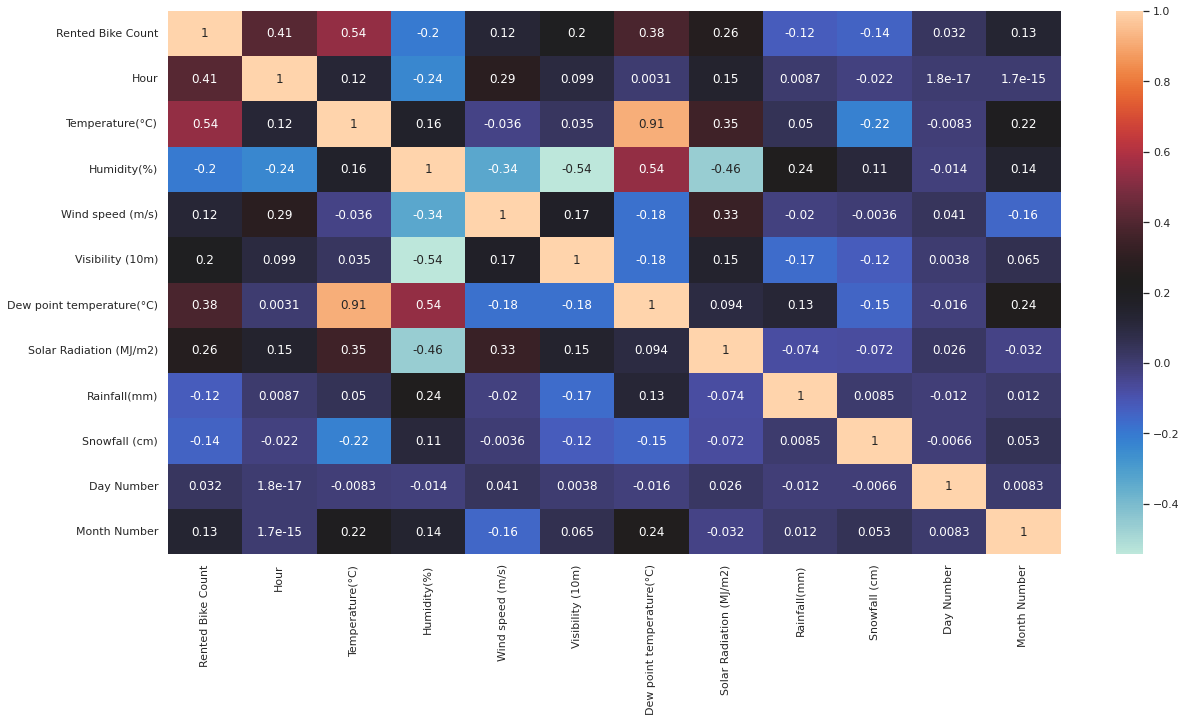

In [14]:
sns.heatmap(total_df.corr(), cmap = "icefire", annot = True)

<AxesSubplot:>

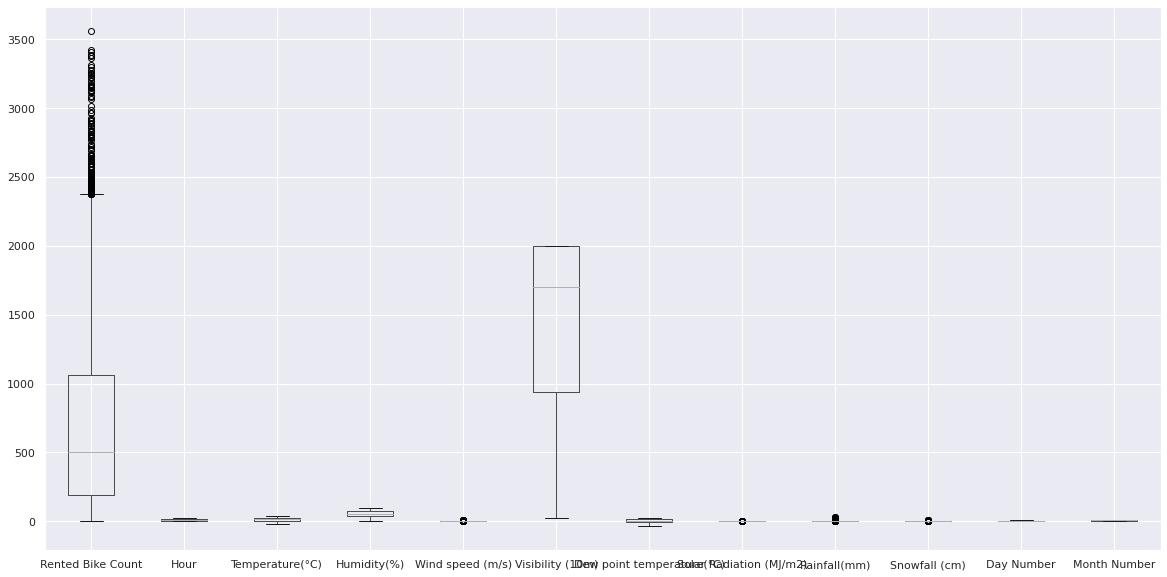

In [15]:
total_df.boxplot()

<AxesSubplot:xlabel='Rented Bike Count'>

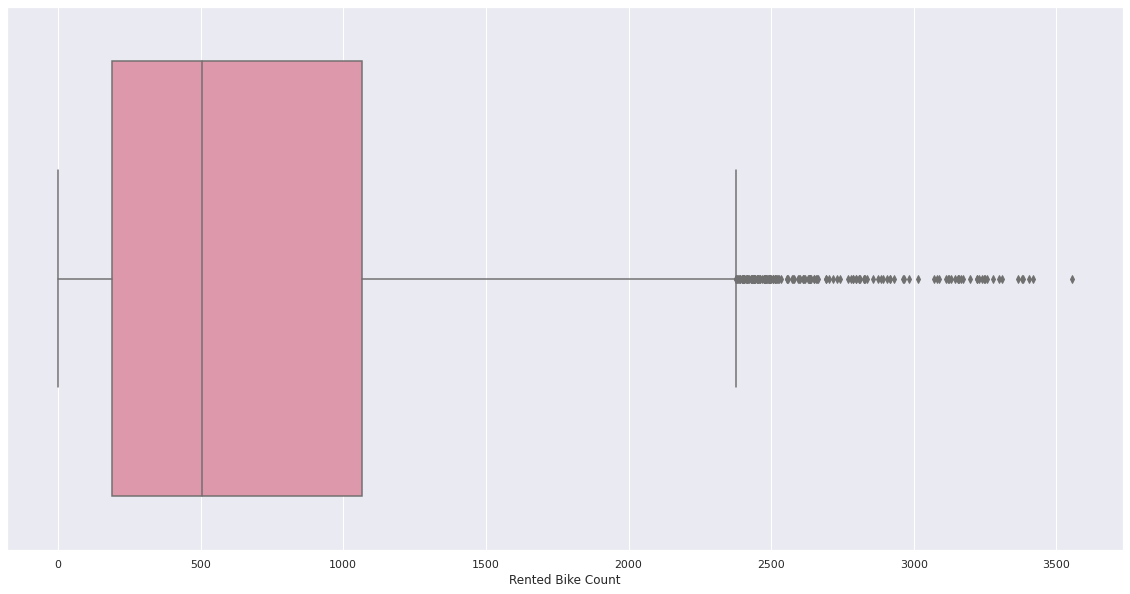

In [16]:
sns.boxplot(x = total_df["Rented Bike Count"], color = "#EA8CA7")

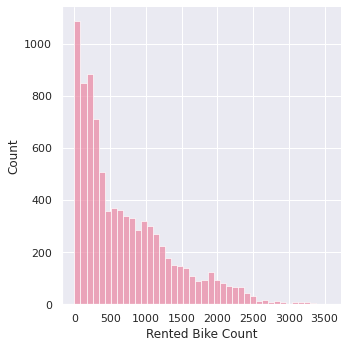

In [17]:
# Extremly Right Skewed normal distribution needs normalization for linear based regressions
sns.displot(total_df["Rented Bike Count"], color = "#EA8CA7")

In [18]:
print(total_df["Rented Bike Count"].mean())

704.6020547945205


In [19]:
print(total_df["Rented Bike Count"].median())

504.5


/home/rosalynn/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


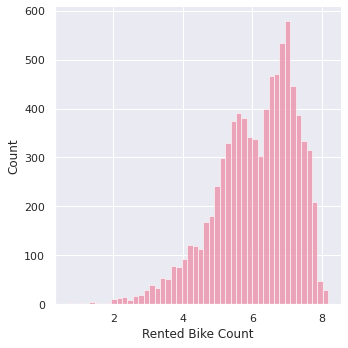

In [20]:
sns.displot(np.log(total_df["Rented Bike Count"]), color = "#EA8CA7")

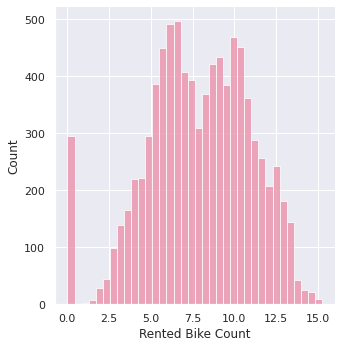

In [21]:
sns.displot(np.cbrt(total_df["Rented Bike Count"]), color = "#EA8CA7") # choose this for Y

In [22]:
print(np.cbrt(total_df["Rented Bike Count"]).mean())

7.866759583223073


In [23]:
print(np.cbrt(total_df["Rented Bike Count"]).median())

7.960744328791014


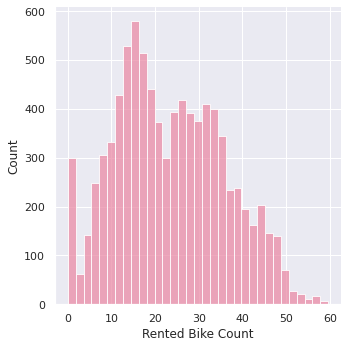

In [24]:
sns.displot(np.sqrt(total_df["Rented Bike Count"]), color = "#EA8CA7")

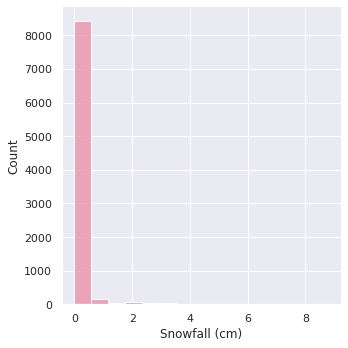

In [25]:
sns.displot(total_df["Snowfall (cm)"], color = "#EA8CA7")

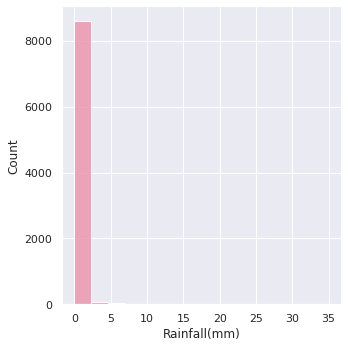

In [26]:
sns.displot(total_df["Rainfall(mm)"], color = "#EA8CA7")

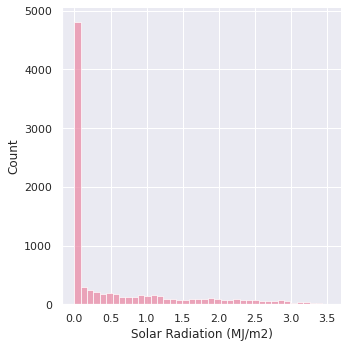

In [27]:
sns.displot(total_df["Solar Radiation (MJ/m2)"], color = "#EA8CA7")

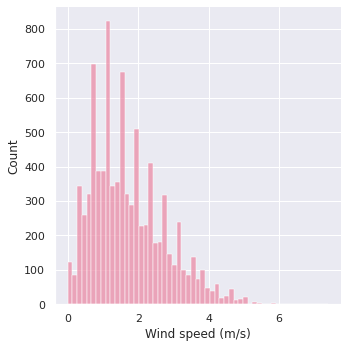

In [28]:
sns.displot(total_df["Wind speed (m/s)"], color = "#EA8CA7")

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

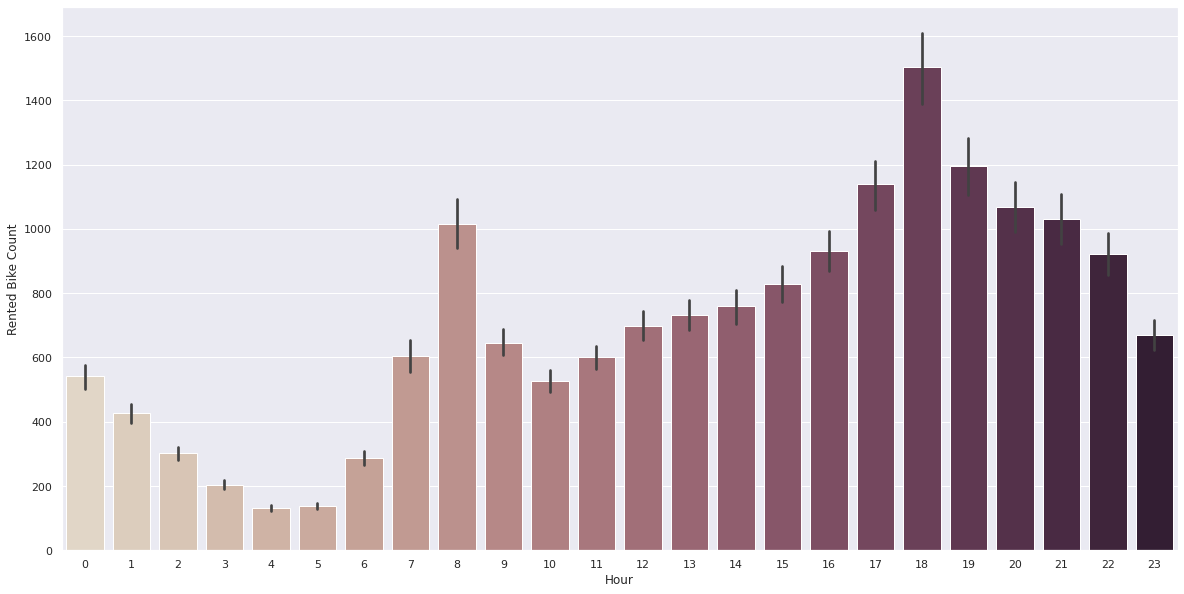

In [29]:
# Evening sees most users suggesting commute or evening outings
sns.barplot(x = total_df["Hour"], y = total_df["Rented Bike Count"], palette="ch:.25")

<AxesSubplot:xlabel='Day', ylabel='Rented Bike Count'>

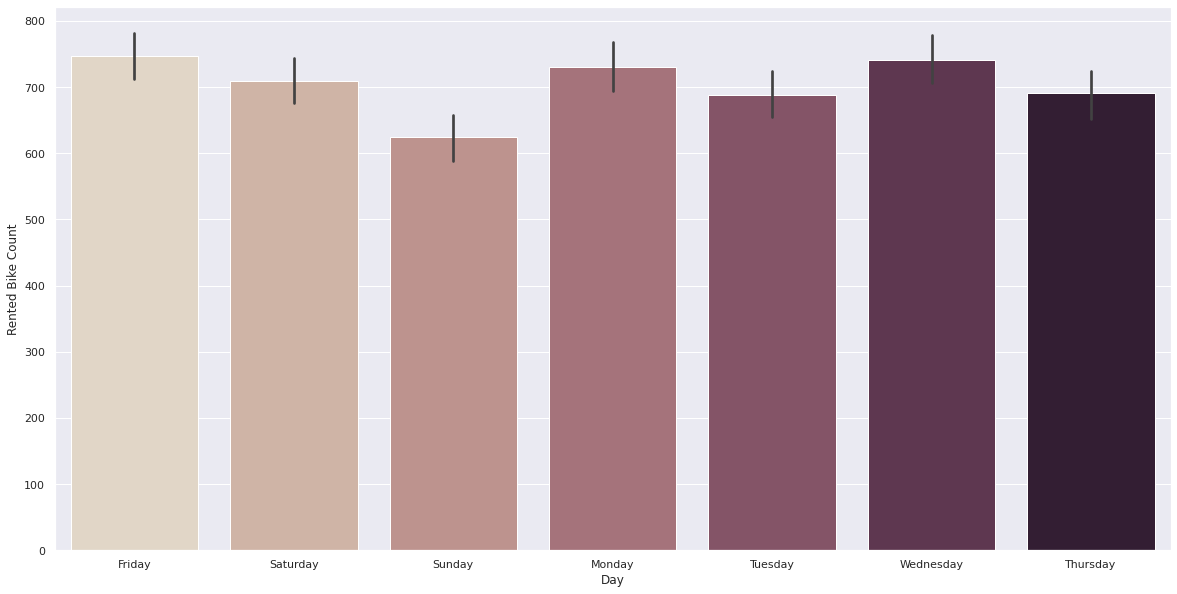

In [30]:
# Weekdays have most users
sns.barplot(x = total_df["Day"], y = total_df["Rented Bike Count"], palette="ch:.25")

<AxesSubplot:xlabel='Month', ylabel='Rented Bike Count'>

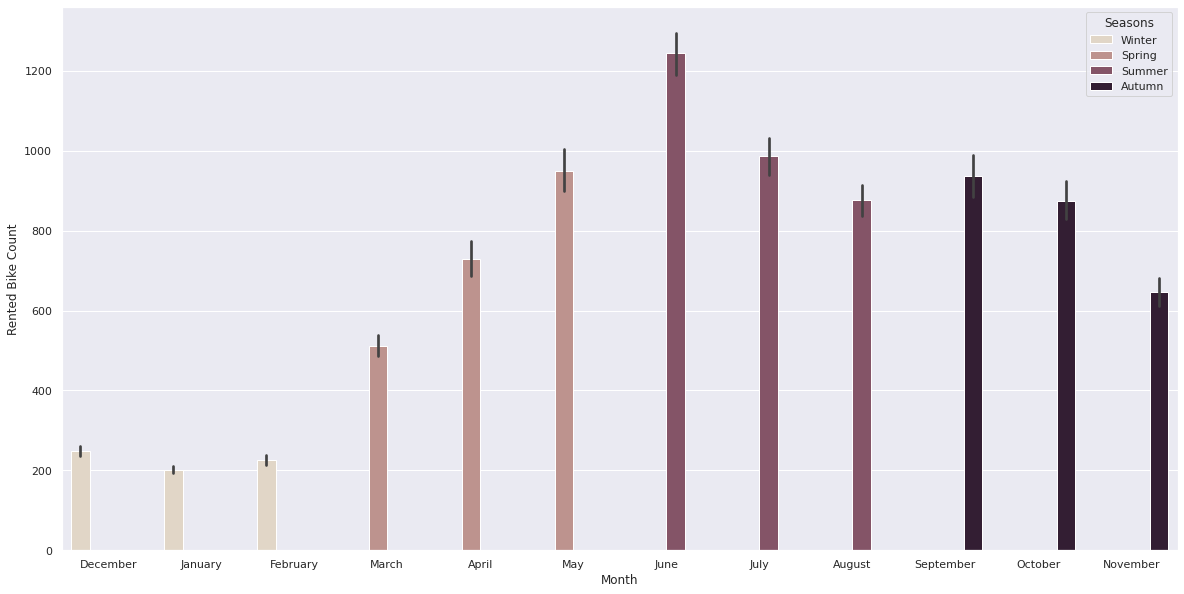

In [31]:
# Winter has low users
sns.barplot(x = total_df["Month"], y = total_df["Rented Bike Count"], hue = total_df["Seasons"], palette="ch:.25")

<AxesSubplot:xlabel='Temperature(°C)', ylabel='Rented Bike Count'>

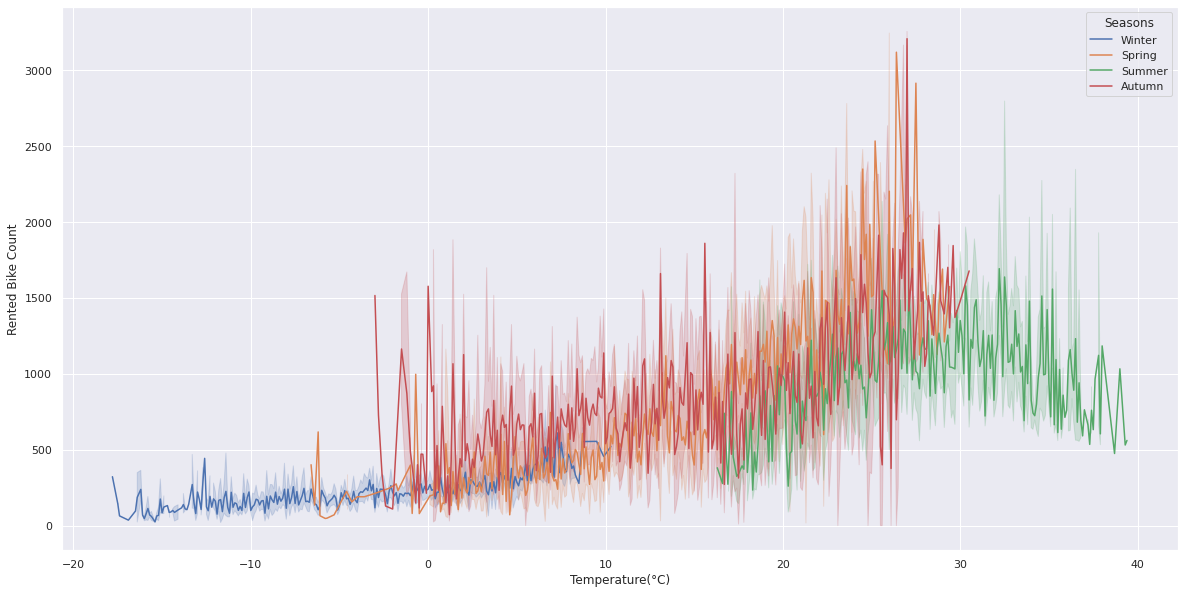

In [32]:
# Most users around 25C
sns.lineplot(x = total_df["Temperature(°C)"], y = total_df["Rented Bike Count"], hue = total_df["Seasons"], color="#EA8CA7")

<AxesSubplot:xlabel='Humidity(%)', ylabel='Rented Bike Count'>

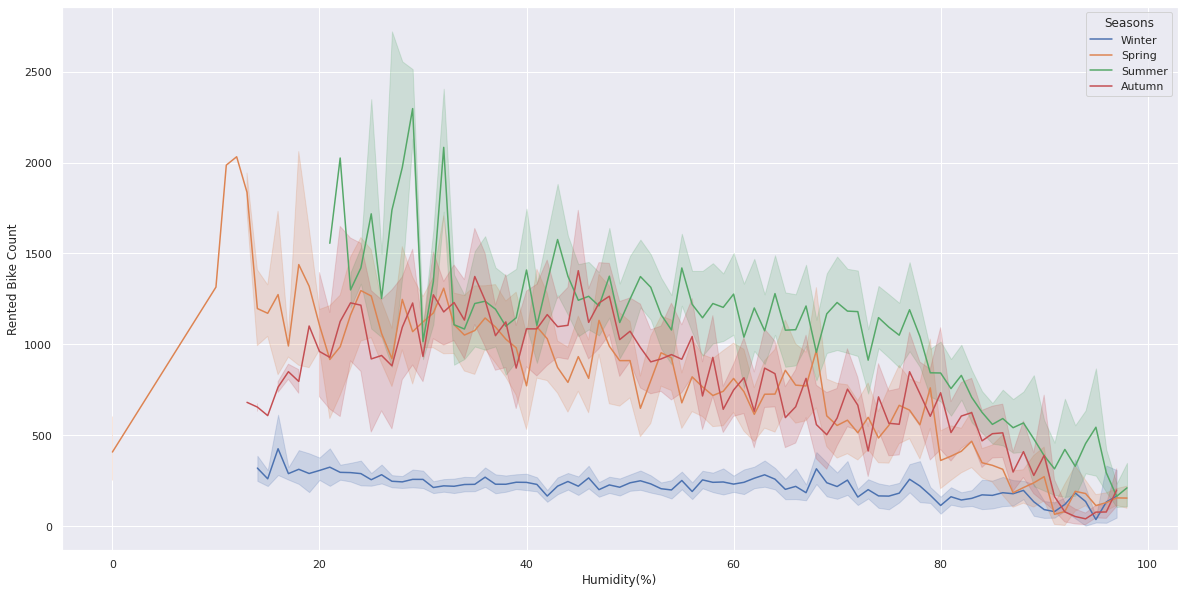

In [33]:
# Moderate humidity needed
sns.lineplot(x = total_df["Humidity(%)"], y = total_df["Rented Bike Count"], hue = total_df["Seasons"],color="#EA8CA7")

<AxesSubplot:xlabel='Wind speed (m/s)', ylabel='Rented Bike Count'>

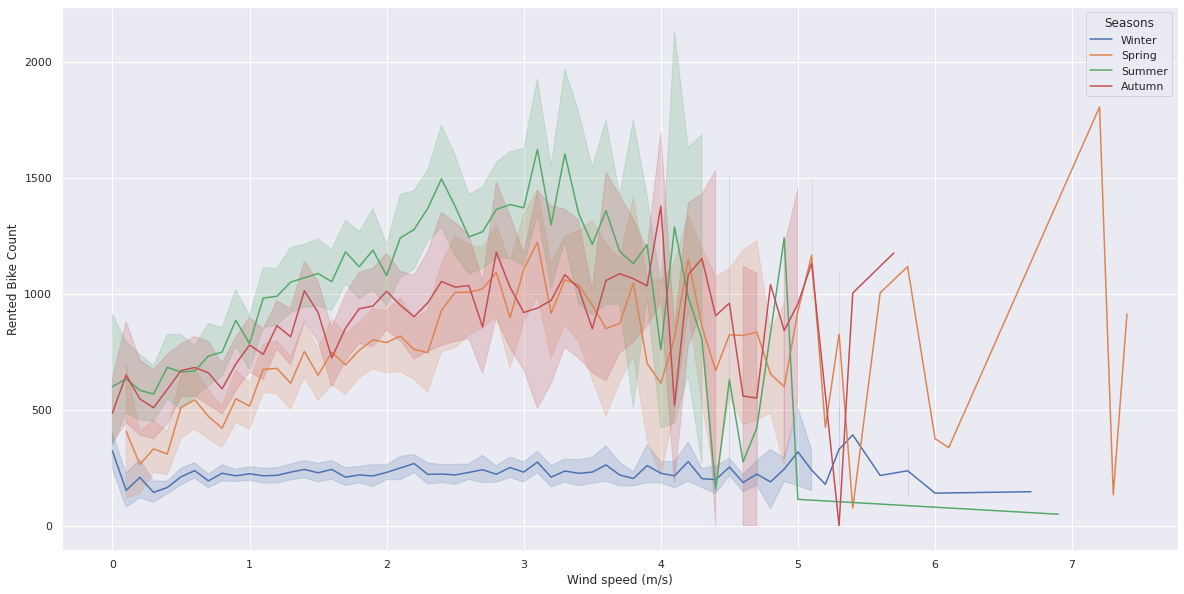

In [34]:
# Windy day preferable
sns.lineplot(x = total_df["Wind speed (m/s)"], y = total_df["Rented Bike Count"], hue = total_df["Seasons"], color="#EA8CA7")

<AxesSubplot:xlabel='Visibility (10m)', ylabel='Rented Bike Count'>

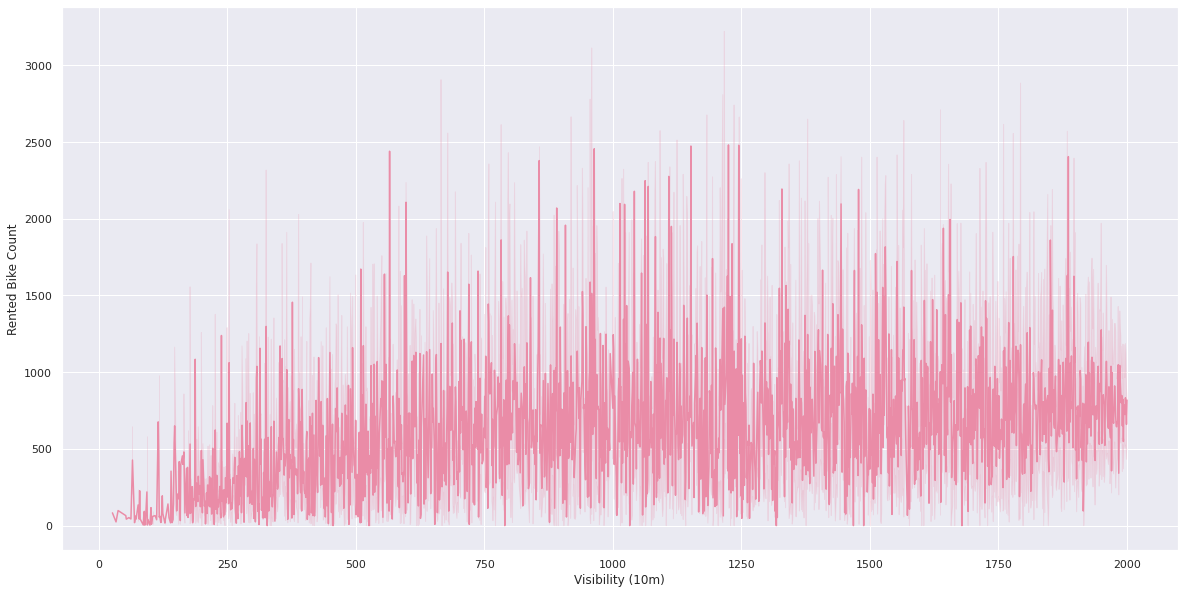

In [35]:
# Not much impact
sns.lineplot(x = total_df["Visibility (10m)"], y = total_df["Rented Bike Count"], color="#EA8CA7")

<AxesSubplot:xlabel='Solar Radiation (MJ/m2)', ylabel='Rented Bike Count'>

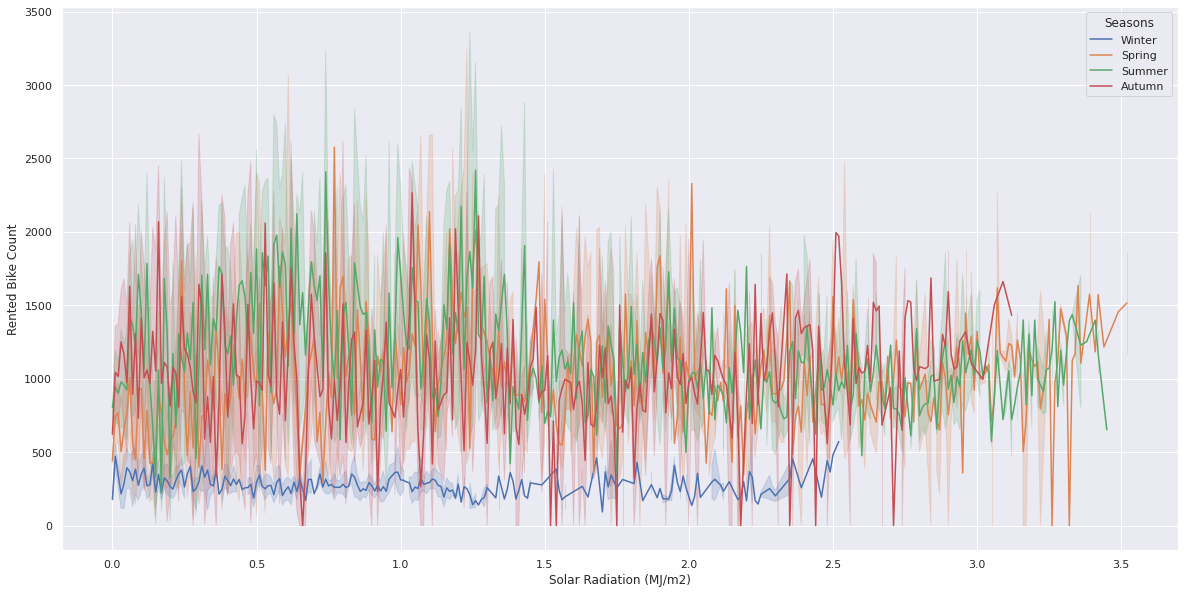

In [36]:
# Solar RADiation most in summer
sns.lineplot(x = total_df["Solar Radiation (MJ/m2)"], y = total_df["Rented Bike Count"], hue = total_df["Seasons"],color="#EA8CA7")

<AxesSubplot:xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

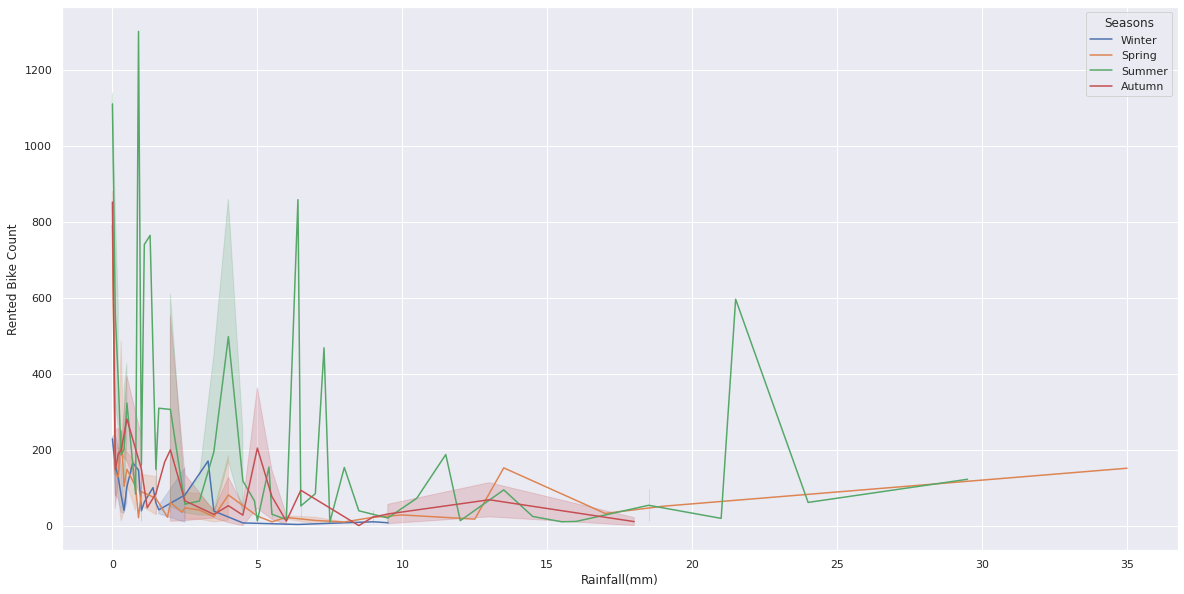

In [37]:
# 20 to 25 spike is in summer so not too problematic
sns.lineplot(x = total_df["Rainfall(mm)"], y = total_df["Rented Bike Count"], hue = total_df["Seasons"], color="#EA8CA7")

<AxesSubplot:xlabel='Snowfall (cm)', ylabel='Rented Bike Count'>

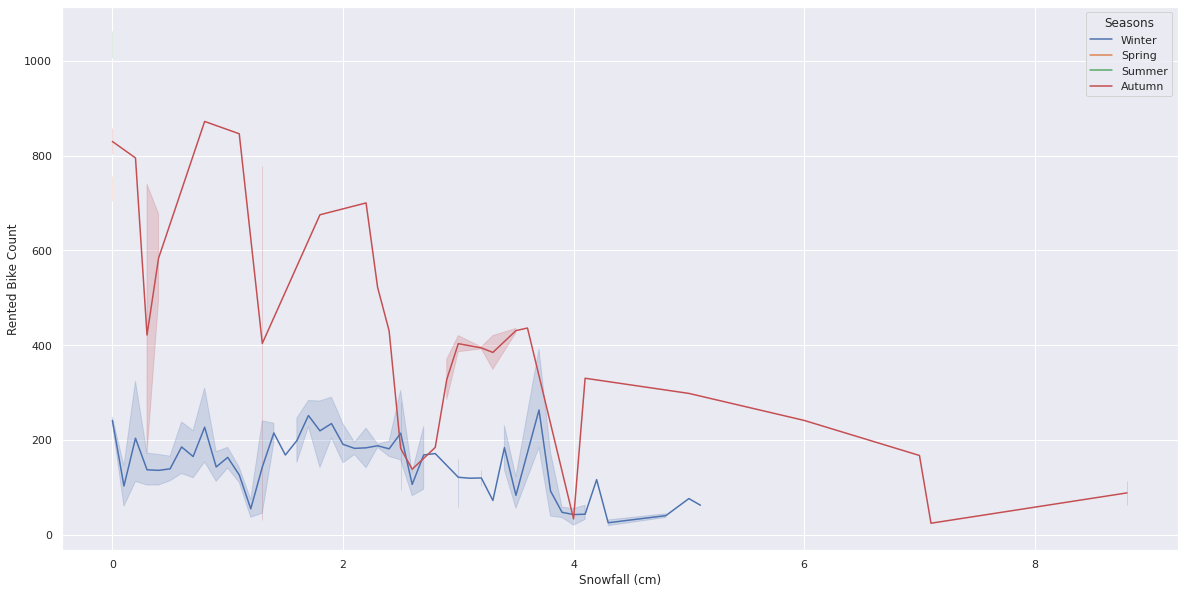

In [38]:
# Users drop after 3-4 cm snow
sns.lineplot(x = total_df["Snowfall (cm)"], y = total_df["Rented Bike Count"], hue = total_df["Seasons"], color="#EA8CA7")

<AxesSubplot:xlabel='Holiday', ylabel='Rented Bike Count'>

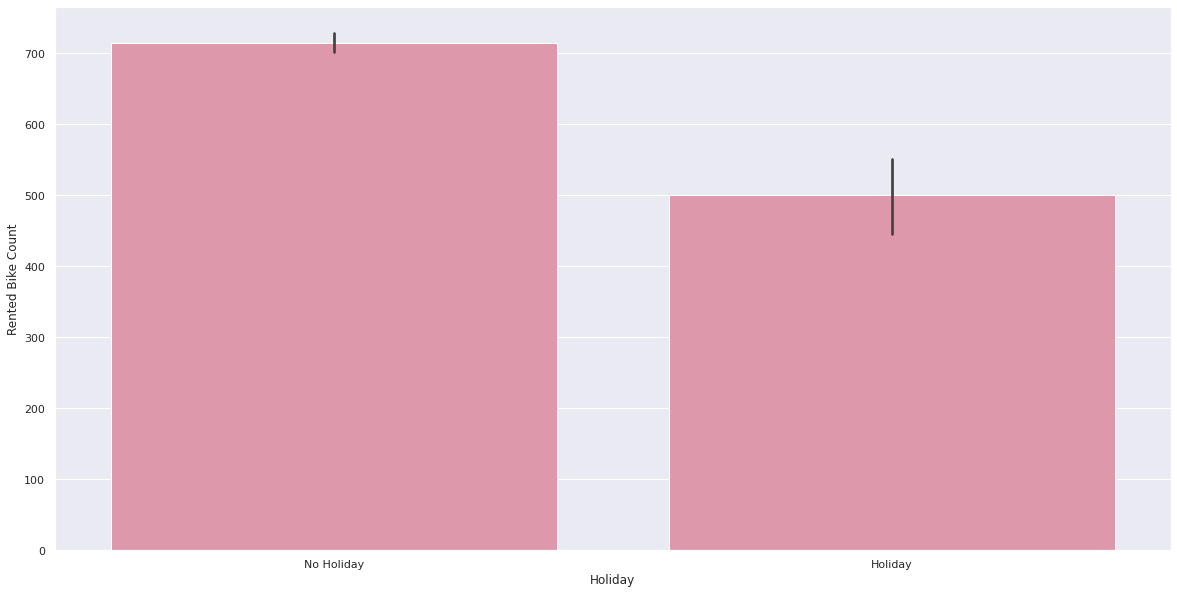

In [39]:
# Similar in holidays
sns.barplot(x = total_df["Holiday"], y = total_df["Rented Bike Count"], color="#EA8CA7")

<AxesSubplot:ylabel='Holiday'>

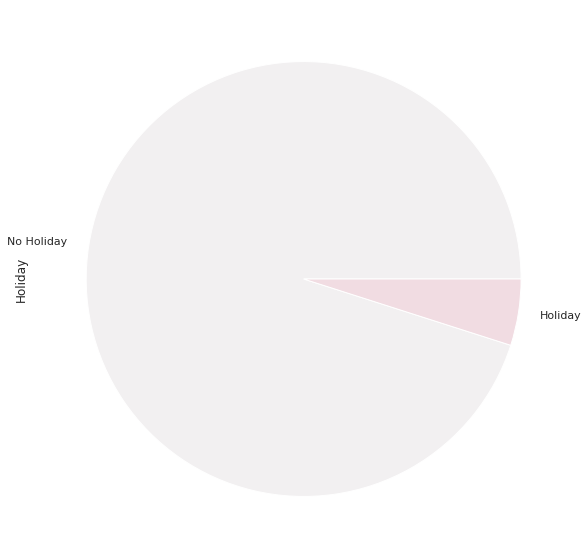

In [40]:
total_df["Holiday"].value_counts().plot.pie(colors = sns.color_palette("light:#EA8CA7"))

<AxesSubplot:xlabel='Functioning Day', ylabel='Rented Bike Count'>

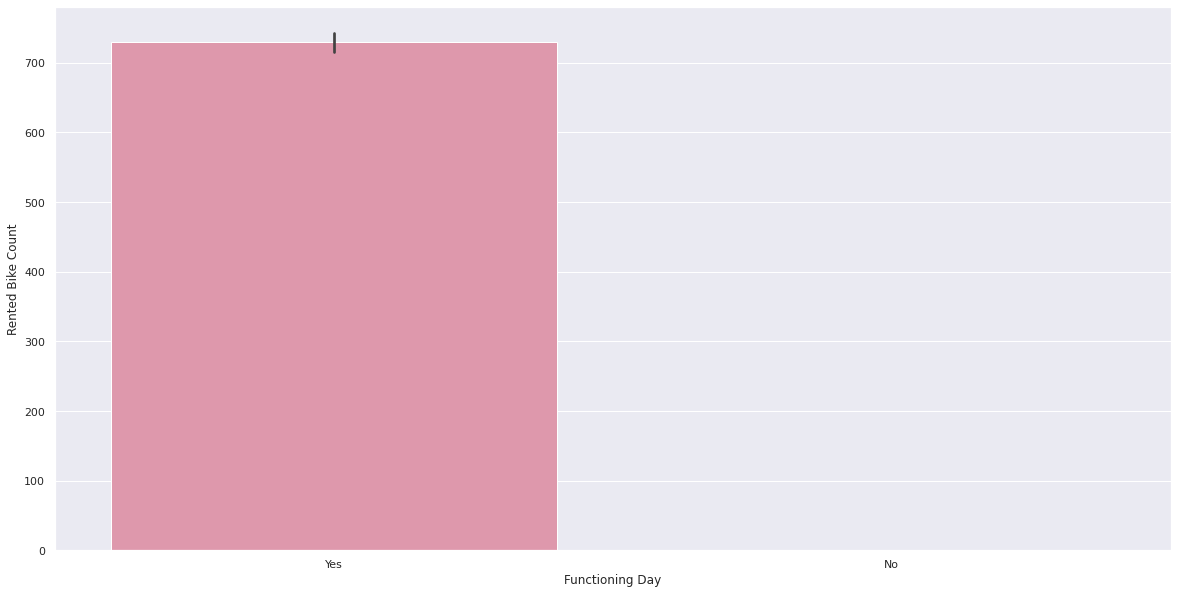

In [41]:
sns.barplot(x = total_df["Functioning Day"], y = total_df["Rented Bike Count"], color="#EA8CA7")

<AxesSubplot:ylabel='Functioning Day'>

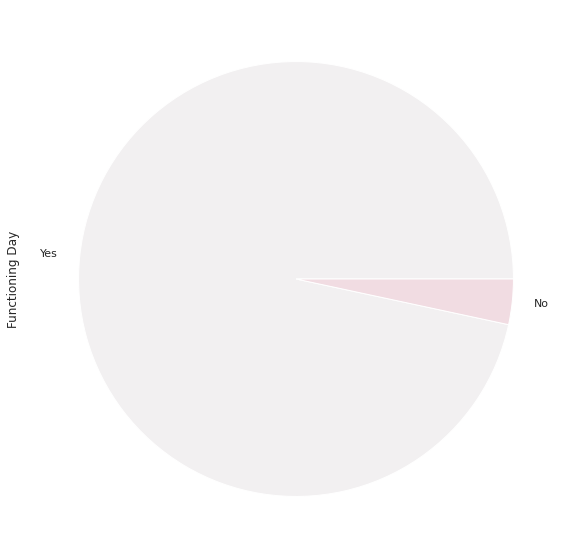

In [42]:
total_df['Functioning Day'].value_counts().plot.pie(colors = sns.color_palette("light:#EA8CA7"))

In [43]:
x.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Day Number,Month Number
0,2017-12-01,0,-5.200,37,2.200,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes,Friday,December,6,12
1,2017-12-01,1,-5.500,38,0.800,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes,Friday,December,6,12
2,2017-12-01,2,-6.000,39,1.000,2000,-17.700,0.000,0.000,0.000,Winter,No Holiday,Yes,Friday,December,6,12
3,2017-12-01,3,-6.200,40,0.900,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes,Friday,December,6,12
4,2017-12-01,4,-6.000,36,2.300,2000,-18.600,0.000,0.000,0.000,Winter,No Holiday,Yes,Friday,December,6,12


In [44]:
y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

In [45]:
x["Season Number"] = x["Seasons"].map({'Summer' : 1, 'Autumn' : 2, 'Winter' : 3, 'Spring' : 4})
x["Holiday Status"] = x["Holiday"].apply(lambda x : 1 if x == 'Holiday' else 2)
x["Function"] = x["Functioning Day"].apply(lambda x : 1 if x == 'Yes' else 2)
x.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Day Number,Month Number,Season Number,Holiday Status,Function
0,2017-12-01,0,-5.200,37,2.200,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes,Friday,December,6,12,3,2,1
1,2017-12-01,1,-5.500,38,0.800,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes,Friday,December,6,12,3,2,1
2,2017-12-01,2,-6.000,39,1.000,2000,-17.700,0.000,0.000,0.000,Winter,No Holiday,Yes,Friday,December,6,12,3,2,1
3,2017-12-01,3,-6.200,40,0.900,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes,Friday,December,6,12,3,2,1
4,2017-12-01,4,-6.000,36,2.300,2000,-18.600,0.000,0.000,0.000,Winter,No Holiday,Yes,Friday,December,6,12,3,2,1


In [46]:
x.tail()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Day Number,Month Number,Season Number,Holiday Status,Function
8755,2018-11-30,19,4.200,34,2.600,1894,-10.300,0.000,0.000,0.000,Autumn,No Holiday,Yes,Friday,November,6,11,2,2,1
8756,2018-11-30,20,3.400,37,2.300,2000,-9.900,0.000,0.000,0.000,Autumn,No Holiday,Yes,Friday,November,6,11,2,2,1
8757,2018-11-30,21,2.600,39,0.300,1968,-9.900,0.000,0.000,0.000,Autumn,No Holiday,Yes,Friday,November,6,11,2,2,1
8758,2018-11-30,22,2.100,41,1.000,1859,-9.800,0.000,0.000,0.000,Autumn,No Holiday,Yes,Friday,November,6,11,2,2,1
8759,2018-11-30,23,1.900,43,1.300,1909,-9.300,0.000,0.000,0.000,Autumn,No Holiday,Yes,Friday,November,6,11,2,2,1


In [47]:
y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

In [48]:
x.corr()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day Number,Month Number,Season Number,Holiday Status,Function
Hour,1.000,0.124,-0.242,0.285,0.099,0.003,0.145,0.009,-0.022,0.000,0.000,-0.000,0.000,-0.005
Temperature(°C),0.124,1.000,0.159,-0.036,0.035,0.913,0.354,0.050,-0.218,-0.008,0.216,-0.535,0.056,0.050
Humidity(%),-0.242,0.159,1.000,-0.337,-0.543,0.537,-0.462,0.236,0.108,-0.014,0.140,-0.154,0.050,0.021
Wind speed (m/s),0.285,-0.036,-0.337,1.000,0.172,-0.176,0.332,-0.020,-0.004,0.041,-0.157,0.132,-0.023,-0.005
Visibility (10m),0.099,0.035,-0.543,0.172,1.000,-0.177,0.150,-0.168,-0.122,0.004,0.065,-0.166,-0.032,0.026
Dew point temperature(°C),0.003,0.913,0.537,-0.176,-0.177,1.000,0.094,0.126,-0.151,-0.016,0.243,-0.529,0.067,0.053
Solar Radiation (MJ/m2),0.145,0.354,-0.462,0.332,0.150,0.094,1.000,-0.074,-0.072,0.026,-0.032,-0.056,0.005,0.008
Rainfall(mm),0.009,0.050,0.236,-0.020,-0.168,0.126,-0.074,1.000,0.008,-0.012,0.012,-0.030,0.014,-0.002
Snowfall (cm),-0.022,-0.218,0.108,-0.004,-0.122,-0.151,-0.072,0.008,1.000,-0.007,0.053,0.048,0.013,-0.032
Day Number,0.000,-0.008,-0.014,0.041,0.004,-0.016,0.026,-0.012,-0.007,1.000,0.008,-0.002,0.064,0.021


<AxesSubplot:>

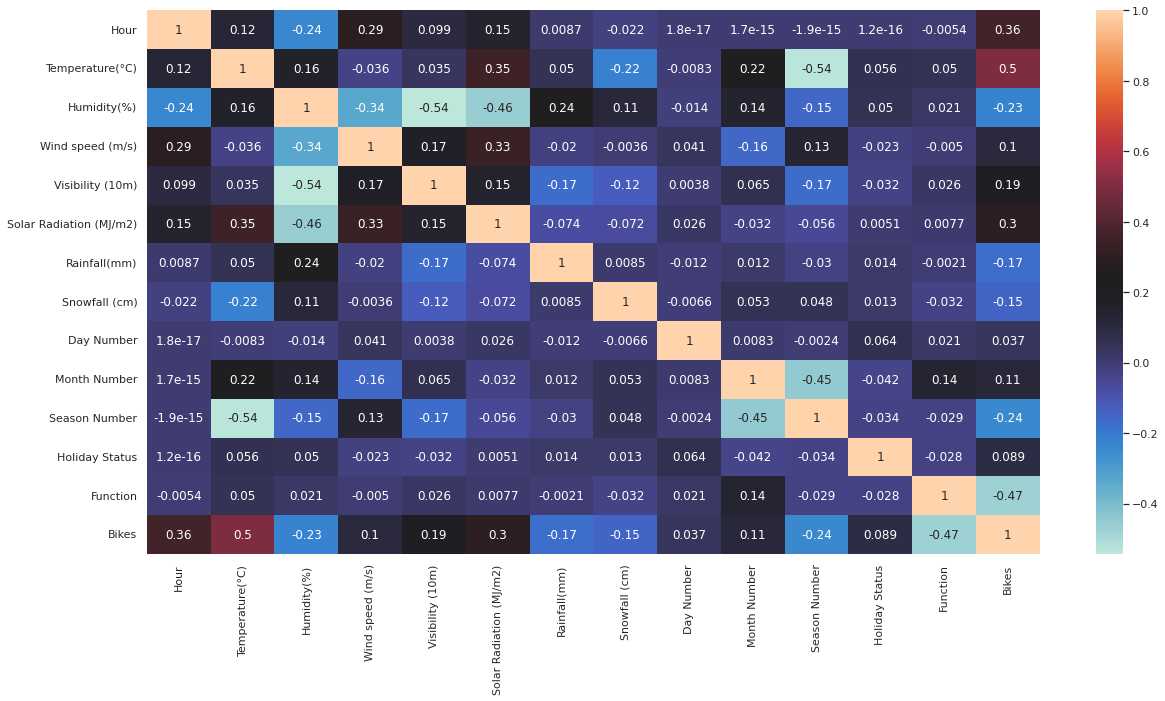

In [49]:
# Corr with converted datatypes
x_temp = x.drop(["Dew point temperature(°C)"], axis = 1)
x_temp["Bikes"] = np.cbrt(y)
sns.heatmap(x_temp.corr(), cmap = "icefire", annot = True)



---


# SUMMARY

---
Rented Bike Count has many outliers in boxplot, so normalize it.
Use cube root to fix the right skewness.

Evening sees peak users.

Weekdays have more users.

Months of summer, autumn, spring have more users than in winter.

Most users use bikes at about 25C - 30C explainable by seasons.

Moderate humidity during renting hours due to seasons.

Light winds during renting hours due to seasons.

Visibility doesn't have much impact except in winter.

Rainfall above 10mm results in low users except in summer where the spike in rents is.

Snowfall above 4cm drastically affects rents in winter.

Since holidays are less, rents remain somewhat similar.

No rents on non-functioning days.

In conclusion, users rent bikes when the weather is pleasant.



---


# TESTING

---





---


REGRESSIONS BASED ON LINEAR / NON-LINEAR MODELS

---



In [50]:
# Linear
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sks
x_calc = x.drop(["Date", "Dew point temperature(°C)", "Seasons", "Holiday", "Functioning Day", "Day", "Month"], axis = 1)
y_calc = np.cbrt(y)
x_tr, x_ts, y_tr, y_ts = tts(x_calc, y_calc, test_size = 0.3)
lin_reg = LinearRegression().fit(x_tr, y_tr)
print(lin_reg.score(x_tr, y_tr))
print(lin_reg.score(x_ts, y_ts))
print(sks.mean_absolute_error(y_ts, lin_reg.predict(x_ts)))
print(sks.mean_squared_error(y_ts, lin_reg.predict(x_ts)))

0.6849901093186717
0.6759480742100117
1.390606651019041
3.195617706817099


In [51]:
# Ridge
from sklearn.linear_model import Ridge
import sklearn.metrics as sks
x_calc = x.drop(["Date", "Dew point temperature(°C)", "Seasons", "Holiday", "Functioning Day", "Day", "Month"], axis = 1)
y_calc = np.cbrt(y)
x_tr, x_ts, y_tr, y_ts = tts(x_calc, y_calc, test_size = 0.3)
ridge_reg = Ridge(alpha = 0.1).fit(x_tr, y_tr)
print(ridge_reg.score(x_tr, y_tr))
print(ridge_reg.score(x_ts, y_ts))
print(sks.mean_absolute_error(y_ts, ridge_reg.predict(x_ts)))
print(sks.mean_squared_error(y_ts, ridge_reg.predict(x_ts)))

0.6888874169177955
0.6605566179880809
1.3535416673283456
3.2284831066101156


In [52]:
# Lasso
from sklearn.linear_model import Lasso
import sklearn.metrics as sks
x_calc = x.drop(["Date", "Dew point temperature(°C)", "Seasons", "Holiday", "Functioning Day", "Day", "Month"], axis = 1)
y_calc = np.cbrt(y)
x_tr, x_ts, y_tr, y_ts = tts(x_calc, y_calc, test_size = 0.3)
lass_reg = Lasso(alpha = 0.01).fit(x_tr, y_tr)
print(lass_reg.score(x_tr, y_tr))
print(lass_reg.score(x_ts, y_ts))
print(sks.mean_absolute_error(y_ts, lass_reg.predict(x_ts)))
print(sks.mean_squared_error(y_ts, lass_reg.predict(x_ts)))

0.6824607079714584
0.6797145870352946
1.3405962013662451
3.0182172344763845


In [53]:
# Elastic Net
from sklearn.linear_model import ElasticNet
import sklearn.metrics as sks
x_calc = x.drop(["Date", "Dew point temperature(°C)", "Seasons", "Holiday", "Functioning Day", "Day", "Month"], axis = 1)
y_calc = np.cbrt(y)
x_tr, x_ts, y_tr, y_ts = tts(x_calc, y_calc, test_size = 0.3)
en_reg = ElasticNet(alpha = 0.01).fit(x_tr, y_tr)
print(en_reg.score(x_tr, y_tr))
print(en_reg.score(x_ts, y_ts))
print(sks.mean_absolute_error(y_ts, en_reg.predict(x_ts)))
print(sks.mean_squared_error(y_ts, en_reg.predict(x_ts)))

0.6723531972306801
0.6845863545831568
1.362542597625806
3.0494541600452174


In [54]:
# Poly
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sks
x_calc = x.drop(["Date", "Dew point temperature(°C)", "Seasons", "Holiday", "Functioning Day", "Day", "Month"], axis = 1)
y_calc = np.cbrt(y)
x_tr, x_ts, y_tr, y_ts = tts(x_calc, y_calc, test_size = 0.3)
x_tr = PolynomialFeatures(degree = 2).fit_transform(x_tr)
x_ts = PolynomialFeatures(degree = 2).fit_transform(x_ts)
lin_reg = LinearRegression().fit(x_tr, y_tr)
print(lin_reg.score(x_tr, y_tr))
print(lin_reg.score(x_ts, y_ts))
print(sks.mean_absolute_error(y_ts, lin_reg.predict(x_ts)))
print(sks.mean_squared_error(y_ts, lin_reg.predict(x_ts)))

0.7954379614290946
0.7740929355557817
1.078579034487476
2.2404761510467894


In [55]:
# Poly Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import sklearn.metrics as sks
x_calc = x.drop(["Date", "Dew point temperature(°C)", "Seasons", "Holiday", "Functioning Day", "Day", "Month"], axis = 1)
y_calc = np.cbrt(y)
x_tr, x_ts, y_tr, y_ts = tts(x_calc, y_calc, test_size = 0.3)
x_tr = PolynomialFeatures(degree = 2).fit_transform(x_tr)
x_ts = PolynomialFeatures(degree = 2).fit_transform(x_ts)
ridge_reg = Ridge(alpha = 10).fit(x_tr, y_tr)
print(ridge_reg.score(x_tr, y_tr))
print(ridge_reg.score(x_ts, y_ts))
print(sks.mean_absolute_error(y_ts, ridge_reg.predict(x_ts)))
print(sks.mean_squared_error(y_ts, ridge_reg.predict(x_ts)))

0.7996614329184588
0.7784206002308738
1.0727023339420911
2.0376977576960433




---


TREES

---



In [56]:
# Decision Tree about 10% loss b/w train and test
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as sks
x_calc = x.drop(["Date", "Dew point temperature(°C)", "Seasons", "Holiday", "Functioning Day", "Day", "Month"], axis = 1)
y_calc = np.cbrt(y)
x_tr, x_ts, y_tr, y_ts = tts(x_calc, y_calc, test_size = 0.3)
dt_reg = DecisionTreeRegressor(max_depth = 15).fit(x_tr, y_tr)
print(dt_reg.score(x_tr, y_tr))
print(dt_reg.score(x_ts, y_ts))
print(sks.mean_absolute_error(y_ts, dt_reg.predict(x_ts)))
print(sks.mean_squared_error(y_ts, dt_reg.predict(x_ts)))

0.9879157006665895
0.8851836421294498
0.6444230210924646
1.091959563884019


In [57]:
# Random Forest about 4-5% loss b/w train and test
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as sks
x_calc = x.drop(["Date", "Dew point temperature(°C)", "Seasons", "Holiday", "Functioning Day", "Day", "Month"], axis = 1)
y_calc = np.cbrt(y)
x_tr, x_ts, y_tr, y_ts = tts(x_calc, y_calc, test_size = 0.3)
rf_reg = RandomForestRegressor(max_depth = 15).fit(x_tr, y_tr)
print(rf_reg.score(x_tr, y_tr))
print(rf_reg.score(x_ts, y_ts))
print(sks.mean_absolute_error(y_ts, rf_reg.predict(x_ts)))
print(sks.mean_squared_error(y_ts, rf_reg.predict(x_ts)))

0.9853278721542307
0.9374464784460662
0.5049940454137337
0.6196419299397448


In [58]:
# Extra Trees about 5-6% loss b/w train and test
from sklearn.ensemble import ExtraTreesRegressor
import sklearn.metrics as sks
x_calc = x.drop(["Date", "Dew point temperature(°C)", "Seasons", "Holiday", "Functioning Day", "Day", "Month"], axis = 1)
y_calc = np.cbrt(y)
x_tr, x_ts, y_tr, y_ts = tts(x_calc, y_calc, test_size = 0.3)
et_reg = ExtraTreesRegressor(max_depth = 15).fit(x_tr, y_tr)
print(et_reg.score(x_tr, y_tr))
print(et_reg.score(x_ts, y_ts))
print(sks.mean_absolute_error(y_ts, et_reg.predict(x_ts)))
print(sks.mean_squared_error(y_ts, et_reg.predict(x_ts)))

0.9908694756059201
0.9501324759996569
0.46541543006137004
0.4947087081183177


In [59]:
# AdaBoost on Decision Tree about 4-5% loss b/w train and test
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as sks
x_calc = x.drop(["Date", "Dew point temperature(°C)", "Seasons", "Holiday", "Functioning Day", "Day", "Month"], axis = 1)
y_calc = np.cbrt(y)
x_tr, x_ts, y_tr, y_ts = tts(x_calc, y_calc, test_size = 0.3)
ad_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 15).fit(x_tr, y_tr)).fit(x_tr, y_tr)
print(ad_reg.score(x_tr, y_tr))
print(ad_reg.score(x_ts, y_ts))
print(sks.mean_absolute_error(y_ts, ad_reg.predict(x_ts)))
print(sks.mean_squared_error(y_ts, ad_reg.predict(x_ts)))

0.9977968856035849
0.9506407898655156
0.4511206792723289
0.486411921684511


In [60]:
# Gradient Boosting about 2-3% loss b/w train and test but more test error
from sklearn.ensemble import GradientBoostingRegressor
import sklearn.metrics as sks
x_calc = x.drop(["Date", "Dew point temperature(°C)", "Seasons", "Holiday", "Functioning Day", "Day", "Month"], axis = 1)
y_calc = np.cbrt(y)
x_tr, x_ts, y_tr, y_ts = tts(x_calc, y_calc, test_size = 0.3)
gr_reg = GradientBoostingRegressor(n_estimators = 500).fit(x_tr, y_tr)
print(gr_reg.score(x_tr, y_tr))
print(gr_reg.score(x_ts, y_ts))
print(sks.mean_absolute_error(y_ts, gr_reg.predict(x_ts)))
print(sks.mean_squared_error(y_ts, gr_reg.predict(x_ts)))

0.9620817134205216
0.9334641177956625
0.5243921135052031
0.6323335127299969




---
AdaBoost has slightly less error 

AdaBoost > RandomForest > ExtraTrees


---



---
Exporting the Ada boost model

---

In [62]:
import pickle as pik
pik.dump(ad_reg, open("finalmodel.pkl", "wb"))
